# 2025/8/15 pandas模組(合併股票CSV檔為範例)

In [1]:
import pandas as pd
import mplfinance as mpf# 畫 K 線圖的函式庫
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.lines import Line2D# 用於圖例的自定義線條

[*********************100%***********************]  1 of 1 completed


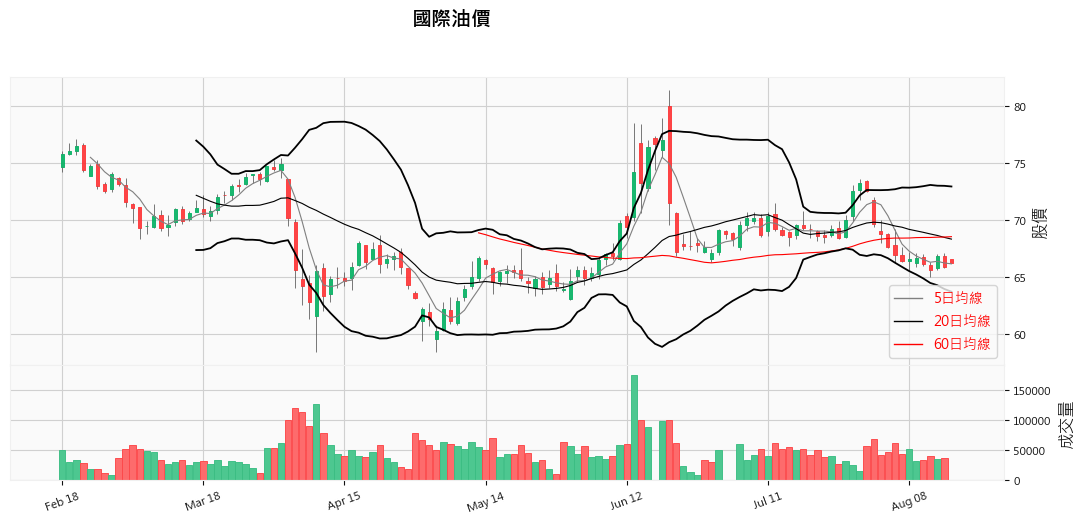

In [2]:
# mplfinance模組測試

df = yf.download("BZ=F", period="6mo", auto_adjust=True)
df.columns = [col[0] for col in df.columns.values]

# 計算布林帶
df['20SMA'] = df['Close'].rolling(window=20).mean()  # 20日簡單移動平均線
df['20STD'] = df['Close'].rolling(window=20).std()  # 20日標準差
df['UpperB'] = df['20SMA'] + (df['20STD'] * 2)  # 上布林帶
df['LowerB'] = df['20SMA'] - (df['20STD'] * 2)  # 下布林帶

custom_style = mpf.make_mpf_style(
    base_mpf_style='yahoo',  # 使用傳入的 style_name
    mavcolors=['gray', 'black', 'red'],  # 均線顏色：5日紅, 10日綠, 20日藍
    rc={
        'font.sans-serif': ['Microsoft JhengHei'],  # 確保顯示繁體中文
        'axes.labelsize': 12,   # X、Y 軸標籤字體大小
        'axes.titlesize': 28,   # 標題字體大小
        'xtick.labelsize': 8,   # X 軸刻度字體大小
        'ytick.labelsize': 8    # Y 軸刻度字體大小
    }
)

# 定義附加圖形（布林帶）
apdict = [
    mpf.make_addplot(df['LowerB'], label="LowerB", color='black'),
    mpf.make_addplot(df['UpperB'], label="UpperB", color='black')
]

fig, axlist = mpf.plot(
    df,
    type='candle',
    volume=True,
    style=custom_style,
    mav=(5, 20, 60),   # 均線 (5日, 20日, 60日)
    figratio=(12, 5),
    title='國際油價',  # 標題
    ylabel='股價',          # 左側 Y 軸標籤
    ylabel_lower='成交量',   # 成交量子圖的 Y 軸標籤
    xrotation=20,            # 日期標籤旋轉角度
    addplot=apdict,          # 添加布林帶
    returnfig=True           # 返回 fig 和 axlist，以便後續自訂
)

# 自訂圖例 (Legend)
legend_labels = ['5日均線', '20日均線', '60日均線']
legend_colors = ['gray', 'black', 'red']  # 與 mavcolors 對應
legend_lines = [Line2D([0], [0], color=color, linewidth=1) for color in legend_colors]

# 將圖例放置於圖表外部右上角
axlist[0].legend(
    legend_lines,               # 自訂曲線樣式
    legend_labels,              # 圖例標籤
    loc='lower right',            # 位置：左上角
    fontsize=10,                # 字體大小
    labelcolor='red'          # 圖例字體顏色
)

plt.show()  # 顯示圖表

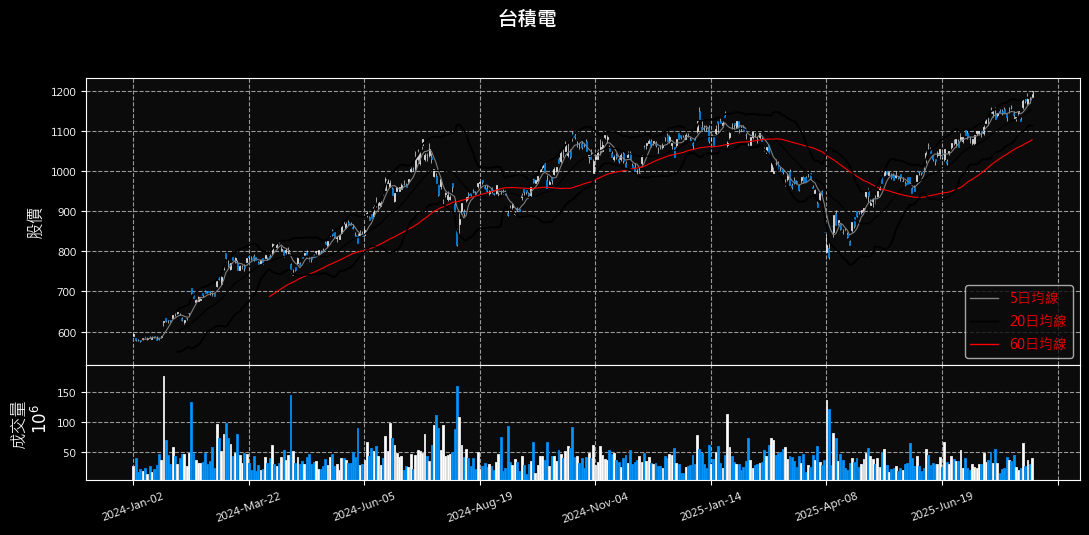

In [3]:
# 合併csv

import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def csv_to_df(file):
    df = pd.read_csv(file,
                     encoding='big5',
                     thousands=',',
                     header=1) 
    df = df.drop(columns=['成交金額', '漲跌價差', '成交筆數', 'Unnamed: 9'])
    df = df[   df['日期'].str.contains(r'[0-9][0-9]/[0-9][0-9]/[0-9][0-9]', regex=True)    ]
    df['國曆年'] = df['日期'].str.slice(start=0, stop=3, step=1) 
    df['月'] = df['日期'].str.slice(start=4, stop=6, step=1) 
    df['日'] = df['日期'].str.slice(start=7, stop=9, step=1) 
    df['西元年'] = df['國曆年'].astype('int32') + 1911
    df['西元日期'] = df['西元年'].astype('string') + '/' + df['月'] + '/' + df['日']
    df = df.drop(columns=['日期', '國曆年', '月', '日', '西元年'])
    df['成交股數'] = df['成交股數'].astype('int32')
    df['開盤價'] = df['開盤價'].astype('float64')
    df['最高價'] = df['最高價'].astype('float64')
    df['最低價'] = df['最低價'].astype('float64')
    df['收盤價'] = df['收盤價'].astype('float64')
    df['西元日期'] = df['西元日期'].astype('datetime64[ns]')
    # Open	High	Low	Close	Volume  Date	
    df = df.rename(columns = {'成交股數':'Volume',
                              '開盤價':'Open',
                              '最高價':'High',
                              '最低價':'Low','收盤價':'Close',
                              '西元日期':'Date'})
    return df.set_index('Date')

import os

def get_all_files(directory):
    file_paths = []
    for root, directories, files in os.walk(directory):
        for filename in files:
            file_path = os.path.join(root, filename)
            file_paths.append(file_path)
    return file_paths

# 使用範例
directory_path = r"C:\Users\Hcedu\Desktop\0709電子電路概論c++,Arduino\python\2330"
all_files = get_all_files(directory_path)

df_list = []
for file in all_files :
    df = csv_to_df(file)
    df_list.append(df)

df = pd.concat(df_list)

# 計算布林帶
df['20SMA'] = df['Close'].rolling(window=20).mean()  # 20日簡單移動平均線
df['20STD'] = df['Close'].rolling(window=20).std()  # 20日標準差
df['UpperB'] = df['20SMA'] + (df['20STD'] * 2)  # 上布林帶
df['LowerB'] = df['20SMA'] - (df['20STD'] * 2)  # 下布林帶

custom_style = mpf.make_mpf_style(
    base_mpf_style='nightclouds',  # 使用傳入的 style_name
    mavcolors=['gray', 'black', 'red'],  # 均線顏色：5日紅, 10日綠, 20日藍
    rc={
        'font.sans-serif': ['Microsoft JhengHei'],  # 確保顯示繁體中文
        'axes.labelsize': 12,   # X、Y 軸標籤字體大小
        'axes.titlesize': 28,   # 標題字體大小
        'xtick.labelsize': 8,   # X 軸刻度字體大小
        'ytick.labelsize': 8    # Y 軸刻度字體大小
    }
)

# 定義附加圖形（布林帶）
apdict = [
    mpf.make_addplot(df['LowerB'], label="LowerB", color='black'),
    mpf.make_addplot(df['UpperB'], label="UpperB", color='black')
]

fig, axlist = mpf.plot(
    df,
    type='candle',
    volume=True,
    style=custom_style,
    mav=(5, 20, 60),   # 均線 (5日, 20日, 60日)
    figratio=(12, 5),
    title='台積電',  # 標題
    ylabel='股價',          # 左側 Y 軸標籤
    ylabel_lower='成交量',   # 成交量子圖的 Y 軸標籤
    xrotation=20,            # 日期標籤旋轉角度
    addplot=apdict,          # 添加布林帶
    returnfig=True           # 返回 fig 和 axlist，以便後續自訂
)

# 自訂圖例 (Legend)
legend_labels = ['5日均線', '20日均線', '60日均線']
legend_colors = ['gray', 'black', 'red']  # 與 mavcolors 對應
legend_lines = [Line2D([0], [0], color=color, linewidth=1) for color in legend_colors]

# 將圖例放置於圖表外部右上角
axlist[0].legend(
    legend_lines,               # 自訂曲線樣式
    legend_labels,              # 圖例標籤
    loc='lower right',            # 位置：左上角
    fontsize=10,                # 字體大小
    labelcolor='red'          # 圖例字體顏色
)

plt.show()  # 顯示圖表